#### 算法思想极度简单， 
#### 应用数学知识近乎为零， 
#### 效果好（？过拟合）， 
#### 可以解释机器学习算法使用过程中的很多细节问题
#### 更完整的刻画机器学习应用的流程

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [143]:
iris = datasets.load_iris()
X, indices = np.unique(iris.data[:, 2:], axis=0, return_index=True)
y = iris.target[indices]

In [157]:
y.shape

(102,)

In [142]:
iris.data[0, 2:]

array([ 1.4,  0.2])

In [178]:
x_predict = np.array([2.5, 0.7])

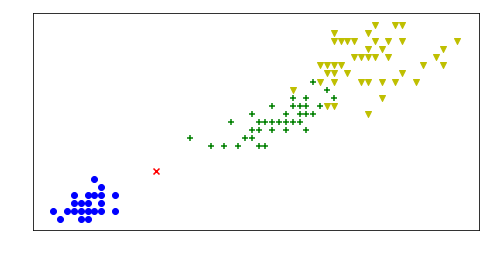

In [179]:
plt.figure(figsize=(8,4)) #实例一个画布 - 当只有一个图的时候，不是必须的

plt.scatter(X[y==0, 0], X[y==0, 1]
            #, s=5 #散点大小
            , c="b" #散点颜色
            #, alpha=0.5
            #, label="Category 01"
            , marker="o"
           )

plt.scatter(X[y==1, 0], X[y==1, 1]
            #, s=5 #散点大小
            , c="g" #散点颜色
            #, alpha=0.5
            #, label="Category 01"
            , marker="+"
           )

plt.scatter(X[y==2, 0], X[y==2, 1]
            #, s=5 #散点大小
            , c="y" #散点颜色
            #, alpha=0.5
            #, label="Category 01"
            , marker="v"
           )

plt.scatter(x_predict[0], x_predict[1]
           # , s=5 #散点大小
            , c="r" #散点颜色
            #, alpha=0.5
            #, label="Category 01"
            , marker="x"
           )

plt.tick_params(direction="out"
                , length=6
                , width=2
                , colors="w"
               # , grid_color='r'
               # , grid_alpha=0.5
               )
plt.show()

In [180]:
distances = np.sqrt(np.sum((x_predict - X)**2, axis=1))
nearests = np.argsort(distances)
K = 11
topK_y = y[nearests[:K]]
topK_y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [191]:
distances[nearests[:K]]

array([ 0.64031242,  0.67082039,  0.78102497,  0.82462113,  0.85440037,
        0.85440037,  0.89442719,  0.90553851,  0.94339811,  0.9486833 ,
        1.02956301])

In [166]:
from collections import Counter

In [182]:
Counter(topK_y)

Counter({0: 9, 1: 2})

In [183]:
votes =  Counter(topK_y)

In [184]:
votes

Counter({0: 9, 1: 2})

In [195]:
votes.most_common(1)

[(0, 9)]

In [194]:
votes.most_common(1)[0][0]

0

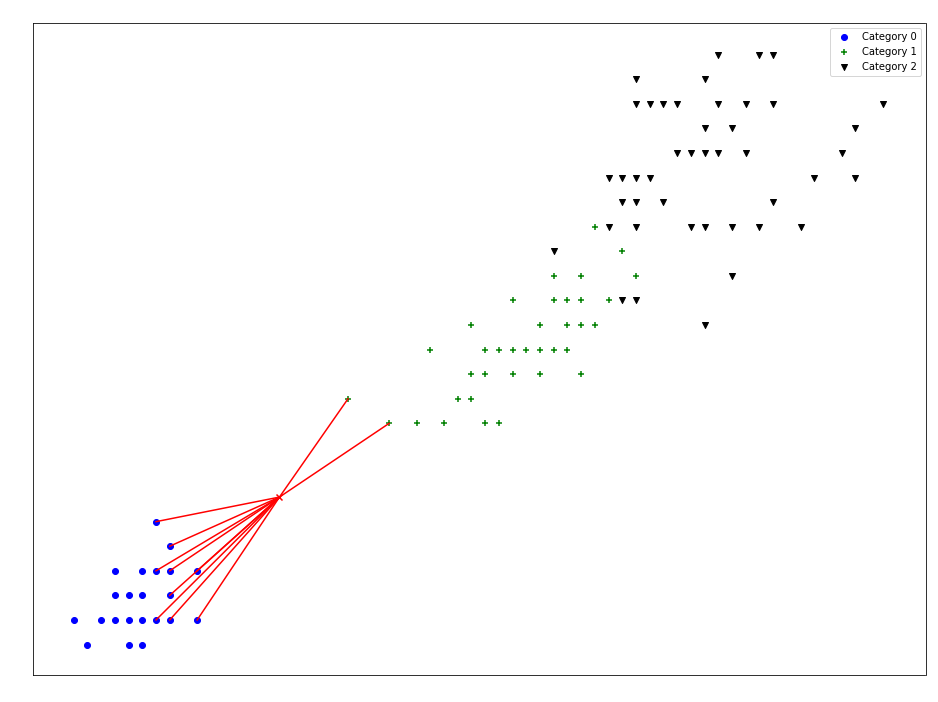

In [204]:
plt.figure(figsize=(16,12)) #实例一个画布 - 当只有一个图的时候，不是必须的

plt.scatter(X[y==0, 0], X[y==0, 1]
            #, s=5 #散点大小
            , c="b" #散点颜色
            #, alpha=0.5
            , label="Category 0"
            , marker="o"
           )

plt.scatter(X[y==1, 0], X[y==1, 1]
            #, s=5 #散点大小
            , c="g" #散点颜色
            #, alpha=0.5
            , label="Category 1"
            , marker="+"
           )

plt.scatter(X[y==2, 0], X[y==2, 1]
            #, s=5 #散点大小
            , c="k" #散点颜色
            #, alpha=0.5
            , label="Category 2"
            , marker="v"
           )

plt.scatter(x_predict[0], x_predict[1]
           # , s=5 #散点大小
            , c="r" #散点颜色
            #, alpha=0.5
            #, label="Category 01"
            , marker="x"
           )

for i in range(K):
    #每次循环构造两个点
    plot_x = [x_predict[0], X[nearests[i], 0]]
    plot_y = [x_predict[1], X[nearests[i], 1]]
    #画两点之间点连线
    plt.plot(plot_x, plot_y, color='r')

    
plt.tick_params(direction="out"
                , length=6
                , width=2
                , colors="w"
               # , grid_color='r'
               # , grid_alpha=0.5
               )
plt.legend()
plt.title('kNN Classifier', color='w')
plt.show()

In [121]:
X[nearests[0],:]

array([ 3. ,  1.1])

In [122]:
X[nearests[2],:]

array([ 3.3,  1. ])

In [123]:
X[nearests[1],:]

array([ 3.3,  1. ])

### 训练、测试数据集分离

In [207]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [216]:
shuffle_indices = np.random.permutation(len(X)) ##注意与np.random.shuffle()的区别

In [217]:
shuffle_indices

array([ 78, 118, 119,  84,  37, 114,  53,  93, 137,  74,   1, 131,  31,
       113, 147,  44,  57, 102,  26,  20,  63, 120, 104,  86,   0,  96,
       146, 112, 116, 130,  34,  42, 110,  22,   2,  51, 126,  72,  88,
        83,  70,  59,  66, 148,  56,  18,  54, 145,  49,  32,  39,  77,
        27,  75,  79, 133,  87,  11, 122, 139,  90,   6, 128,  62,  99,
         9, 117,   5, 136,  41,  12,  82,  38,  24, 138,  64,  76,  89,
        85, 134,  13,  30, 124,  45,  61,   4,  46, 129,  16,  68,  55,
        97, 149,   8, 142,  29,  14, 101, 121,  10,  71, 106, 135,  21,
       108,  48,  73,  25,  19, 125,   3, 109,  28,  23, 143,  81,  35,
        15,  69, 111,  98, 132, 100, 107, 123, 127,   7,  91,  94,  60,
       115,  80,  17,  47,  40,  58,  65,  43,  95,  36,  33,  52, 105,
       140,  92, 144, 103,  67, 141,  50])

In [218]:
test_ratio = 0.2

In [219]:
test_size = int(len(X) * test_ratio)

In [220]:
test_indices = shuffle_indices[:test_size]
train_indices = shuffle_indices[test_size:]

In [222]:
X_train = X[train_indices]
y_train = y[train_indices]

X_test = X[test_indices]
y_test = y[test_indices]

In [289]:
distances = np.array([np.sqrt(np.sum((x - X_train)**2, axis =1)) for x in X_test])
K = 3
nearests = np.argsort(distances, axis=1)
from collections import Counter
y_predict = [Counter(y_test_nearest).most_common(1)[0][0] 
 for y_test_nearest in y_train[nearests[:, :K]]]

In [290]:
np.sum(y_predict == y_test) / len(y_predict)

0.96666666666666667

In [291]:
distances.shape

(30, 120)

In [299]:
y1 = np.array([0, 1, 2, 3, 4, 5])

In [302]:
y1[
    np.array([[1, 4],
     [2, 3]])
]

array([[1, 4],
       [2, 3]])

### from pyML.model_selection import train_test_split

In [17]:
neighbour_indices
iris = datasets.load_iris()
X = iris.data
y = iris.target

from pyML.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
X_train.shape[0]

120

### 使用scikit-learn中的kNN

In [19]:
from pyML.kNN import KNNClassifier

In [20]:
kNN_classifier = KNNClassifier(k=5)

In [21]:
kNN_classifier.fit(X_train, y_train)

KNN(k=5)

In [22]:
y_predict = kNN_classifier.predict(X_test)

In [23]:
y_predict

array([2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 1,
       2, 1, 2, 0, 1, 0, 2])

In [24]:
np.sum(y_predict == y_test)/len(y_test) 

0.96666666666666667

In [51]:
'Hello '.join('ac')

'aHello c'

In [54]:
'Category {:s}'.format(str(100))

'Category 100'

### 分类准确度 

In [5]:
digits = datasets.load_digits()

In [6]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [7]:
iris.keys()

NameError: name 'iris' is not defined

NameError: name 'X' is not defined

In [9]:
X = digits.data

In [10]:
X.shape

(1797, 64)

In [11]:
X = digits.data
y = digits.target

In [12]:
y.shape

(1797,)

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1])

In [15]:
X[:10]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [16]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [17]:
y[0]

0

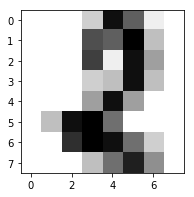

In [25]:
import matplotlib
plt.figure(figsize=(4, 3))
#plt.imshow(X[50].reshape(8,8), cmap=matplotlib.cm.binary)
plt.imshow(X[51].reshape(8,8), cmap=matplotlib.cm.binary)
plt.show()

In [26]:
y[51]

2

In [32]:
from pyML.model_selection import train_test_split
from pyML.kNN import KNNClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
kNN_classifier = KNNClassifier(7)
kNN_classifier.fit(X_train, y_train)

KNN(k=7)

In [35]:
y_predict = kNN_classifier.predict(X_test)

In [36]:
len(X_test)

359

In [38]:
len(X_train)/len(X_test)

4.005571030640668

In [39]:
np.sum(y_test==y_predict)/len(y_test)

0.97493036211699169

In [41]:
X_test[10]

array([  0.,   0.,   0.,   8.,  16.,  16.,  16.,   6.,   0.,   0.,   6.,
        14.,   5.,   8.,  16.,   2.,   0.,   0.,   7.,   4.,   0.,   6.,
        12.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   6.,   0.,   0.,
         0.,   0.,  11.,  16.,  16.,  10.,   0.,   0.,   0.,   0.,  12.,
        16.,   8.,   0.,   0.,   0.,   0.,   0.,   6.,  16.,   0.,   0.,
         0.,   0.,   0.,   0.,  12.,   9.,   0.,   0.,   0.])

In [42]:
y_predict[10]

7

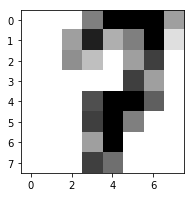

In [43]:
import matplotlib
plt.figure(figsize=(4, 3))
#plt.imshow(X[50].reshape(8,8), cmap=matplotlib.cm.binary)
plt.imshow(X_test[10].reshape(8,8), cmap=matplotlib.cm.binary)
plt.show()

In [44]:
y_test[10]

7

In [45]:
from pyML.metrics import accuracy_score

In [46]:
accuracy_score(y_test, y_predict)

0.97493036211699169

In [3]:
import numpy as np
from pyML.kNN import KNNClassifier
from pyML.model_selection import train_test_split
from pyML.metrics import accuracy_score
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
kNN_classifier = KNNClassifier(7)
kNN_classifier.fit(X_train, y_train)
y_predict = kNN_classifier.predict(X_test)
accuracy_score(y_test, y_predict)

0.99164345403899723

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
kNN_classifier = KNNClassifier(5)
kNN_classifier.fit(X_train, y_train)
kNN_classifier.score(X_test, y_test)

0.99442896935933145

## 超参数

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 666)

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.98055555555555551

### 寻找最好的k

In [25]:
best_k = -1
best_score = 0

In [19]:
best_k = -1
best_score = 0
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
    
print('best_k =', best_k)
print('best_score =', best_score)

best_k = 4
best_score = 0.991666666667


In [20]:
KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [21]:
len(X_test)

360

In [31]:
best_k = -1
best_score = 0
best_method =''
for method in ['uniform', 'distance']:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
    
print('best_k =', best_k)
print('best_score =', best_score)
print('best_method =', best_method)

best_k = 4
best_score = 0.991666666667
best_method = uniform


In [34]:
abc = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=3)

In [36]:
abc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=3,
           weights='uniform')

In [38]:
abc.score(X_test, y_test)

0.98333333333333328

### 网格搜索 Grid Search

In [40]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]        
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

In [43]:
knn_clf = KNeighborsClassifier()

In [59]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)

In [60]:
%%time
grid_search.fit(X_train, y_train) ## 交叉验证， 速度会有点儿慢

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=1, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=2, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.8s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   1.0s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   1.0s
[CV] n_neighbor

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.2s


[CV] ............. n_neighbors=1, p=1, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=2, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ............. n_neighbors=1, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ................... n_neighbors=9, weights=uniform, total=   1.7s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ................... n_neighbors=9, weights=uniform, total=   1.7s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ................... n_neighbors=9, weights=uniform, total=   1.6s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] .

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   55.1s


[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=2, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=1, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=3, weights=distance ............................
[CV] ............. n_neighbors=9, p=2, weights=distance, total=   0.2s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   1.4s
[CV] n_neighbors=9, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   1.5s
[CV] n

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [48]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [49]:
grid_search.best_score_

0.98538622129436326

In [50]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [55]:
y_predict1 = grid_search.predict(X_test)

In [52]:
knn_clf = grid_search.best_estimator_

In [54]:
y_predict2 = knn_clf.predict(X_test)

In [56]:
y_predict1 == y_predict2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [57]:
knn_clf.score(X_test, y_test)

0.98333333333333328

### 数据归一化 Feature Scalling

#### 1。真实环境很有可能无法得到所有测试数据的均值和方差
#### 2。对数据的归一化也是算法的一部分

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X[:10, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 666)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
standard_scaler.mean_

array([ 5.83416667,  3.0825    ,  3.70916667,  1.16916667])

In [9]:
standard_scaler.scale_

array([ 0.81019502,  0.44076874,  1.76295187,  0.75429833])

In [10]:
X_train = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [12]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
knn_clf.score(X_test, y_test)

0.33333333333333331

In [14]:
knn_clf.score(X_test_standard, y_test) ##预测的测试数据集也必须用训练数据集的scaller做归一化

1.0

In [17]:
X_sample = X_train[:3, :]

In [18]:
X_sample

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 5.7,  2.8,  4.1,  1.3]])

In [20]:
np.mean(X_sample, axis=0)

array([ 5.23333333,  3.1       ,  2.3       ,  0.56666667])

In [21]:
np.sum(X_sample, axis=0)

array([ 15.7,   9.3,   6.9,   1.7])

In [22]:
X_sample / np.sum(X_sample, axis=0)

array([[ 0.32484076,  0.37634409,  0.20289855,  0.11764706],
       [ 0.31210191,  0.32258065,  0.20289855,  0.11764706],
       [ 0.36305732,  0.30107527,  0.5942029 ,  0.76470588]])

### 使用自己的机器学习库

In [49]:
import numpy as np
from sklearn import datasets
from pyML.kNN import KNNClassifier
from pyML.model_selection import train_test_split
from pyML.preprocessing import StandardScaler

In [50]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio=0.1, seed = 999)

In [51]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

In [52]:
X_train = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)



In [53]:
knn_clf = KNNClassifier(k=7)
knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)
knn_clf.score(X_test_standard, y_test)


1.0